In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
df=pd.read_csv('data/googleplaystore.csv')

In [3]:
df_copy=df.copy()

In [4]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df_copy.shape

(10841, 13)

In [6]:
df_copy.columns=df_copy.columns.str.replace(" ","_")

In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content_Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last_Updated    10841 non-null  object 
 11  Current_Ver     10833 non-null  object 
 12  Android_Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#Writing a function to check and delete duplicates:

In [8]:
def findduplicate(dataframe):
    print("Checking Duplicates:")
    num_duplicates=df_copy.duplicated(subset=None,keep='first').sum()
    if num_duplicates>0:
        print(f"There are {num_duplicates} in the dataset")
        df_copy.drop_duplicates(keep="first",inplace=True)
        print(f"{num_duplicates} of duplicates are deleted!")
    else:
        print("There are no duplicates!")

In [9]:
findduplicate(df_copy)

Checking Duplicates:
There are 483 in the dataset
483 of duplicates are deleted!


#Removing all the unnecessary columns

Here,we can see that App and Genres contain the same information as Category so we will remove both of them along with Current Version and Android Version which do not seem to contribute immensley to our target variable,

In [10]:
columns_to_delete=['App','Genres','Current_Ver','Android_Ver']
df_copy.drop(columns_to_delete,inplace=True,axis=1)

#Check for null values:

In [11]:
df_copy=df_copy.replace('?',np.nan)

In [12]:
df_copy.isnull().sum()

Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       1
Last_Updated         0
dtype: int64

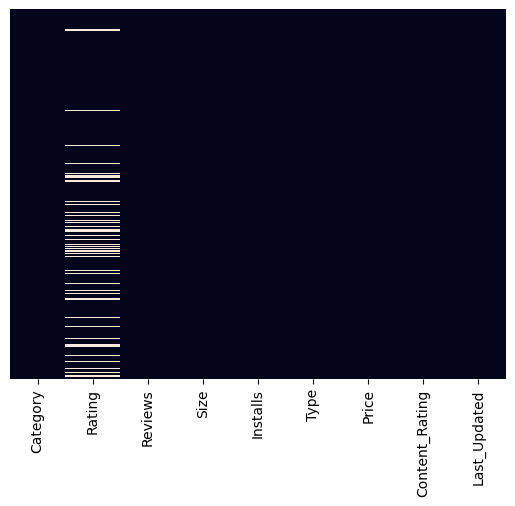

In [13]:
plt.figure(figure=(15,6))
sns.heatmap(df_copy.isnull(), yticklabels=False,cbar=False)
plt.show()

In [14]:
df_copy.dropna(subset=['Content_Rating','Type'],inplace=True,axis=0)

In [15]:
df_copy.Rating.unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [16]:
df_copy.Rating=df_copy.Rating.fillna(df.Rating.mode()[0])

In [17]:
df_copy.isnull().sum()

Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Last_Updated      0
dtype: int64

In [18]:
df_copy.Reviews=df_copy.Reviews.astype(int)

In [19]:
df_copy.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [20]:
df_copy.Size=df_copy.Size.str.replace('M','000')
df_copy.Size=df_copy.Size.str.replace('k','')
df_copy.Size=df_copy.Size.str.replace('1000+','1000')
df_copy.Size = df_copy.Size.replace('Varies with device', np.nan)

In [21]:
df_copy.Size = pd.to_numeric(df_copy.Size, errors='coerce')

In [22]:
median_size = df_copy.Size.median()
df_copy.Size.fillna(median_size, inplace=True)

C:\Users\khadk\AppData\Local\Temp\ipykernel_10144\2921935439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy.Size.fillna(median_size, inplace=True)


In [23]:
df_copy.Size=df_copy.Size.astype(float)

In [24]:
df_copy.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [25]:
df_copy.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [26]:
unrequired_items=['$',',','+']
cols=['Price','Installs']
for items in unrequired_items:
    for category in cols:
        df_copy[category]=df_copy[category].str.replace(items,'')

In [27]:
df_copy.Installs=df_copy.Installs.astype(int)
df_copy.Price=df_copy.Price.astype(float)

In [28]:
df_copy['Last_Updated']=pd.to_datetime(df_copy['Last_Updated'])
df_copy['Month']=df_copy['Last_Updated'].dt.month
df_copy['Year']=df_copy['Last_Updated'].dt.year

In [29]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10356 non-null  object        
 1   Rating          10356 non-null  float64       
 2   Reviews         10356 non-null  int32         
 3   Size            10356 non-null  float64       
 4   Installs        10356 non-null  int32         
 5   Type            10356 non-null  object        
 6   Price           10356 non-null  float64       
 7   Content_Rating  10356 non-null  object        
 8   Last_Updated    10356 non-null  datetime64[ns]
 9   Month           10356 non-null  int32         
 10  Year            10356 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(4), object(3)
memory usage: 809.1+ KB


In [30]:
df_copy.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [31]:
df_copy.Type=df_copy.Type.apply(lambda x:'0' if str(x).lower()=='Free' else 1)

In [32]:
df_copy.Type=df_copy.Type.astype(int)

In [33]:
df_copy.Content_Rating.unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [34]:
df_copy['Content_Rating']=df_copy['Content_Rating'].replace({'Unrated':'Everyone','Adults only 18+':'Mature 17+','Everyone 10+':'Teen'})

In [35]:
df_copy['Content_Rating']=df_copy['Content_Rating'].replace({'Teen':'Teenagers','Mature 17+':'Adults'})

In [36]:
df_copy.Content_Rating.value_counts()

Content_Rating
Everyone     8384
Teenagers    1522
Adults        450
Name: count, dtype: int64

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10356 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        10356 non-null  object        
 1   Rating          10356 non-null  float64       
 2   Reviews         10356 non-null  int32         
 3   Size            10356 non-null  float64       
 4   Installs        10356 non-null  int32         
 5   Type            10356 non-null  int32         
 6   Price           10356 non-null  float64       
 7   Content_Rating  10356 non-null  object        
 8   Last_Updated    10356 non-null  datetime64[ns]
 9   Month           10356 non-null  int32         
 10  Year            10356 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(5), object(2)
memory usage: 768.6+ KB


In [38]:
df_copy.to_csv('data/google_play_store_cleaned.csv',index=False)

#EDA

In [39]:
numerical_features=[features for features in df_copy.columns if df_copy[features].dtype in ['int32','float64']]
print(f" There are {len(numerical_features)} numerical features and they are:",numerical_features)

 There are 8 numerical features and they are: ['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Month', 'Year']


In [40]:
categorical_features=[features for features in df_copy.columns if df_copy[features].dtype in ['object'] ]
print(f" There are {len(categorical_features)} categorical features and they are:",categorical_features)

 There are 2 categorical features and they are: ['Category', 'Content_Rating']


#Univirate Analysis:

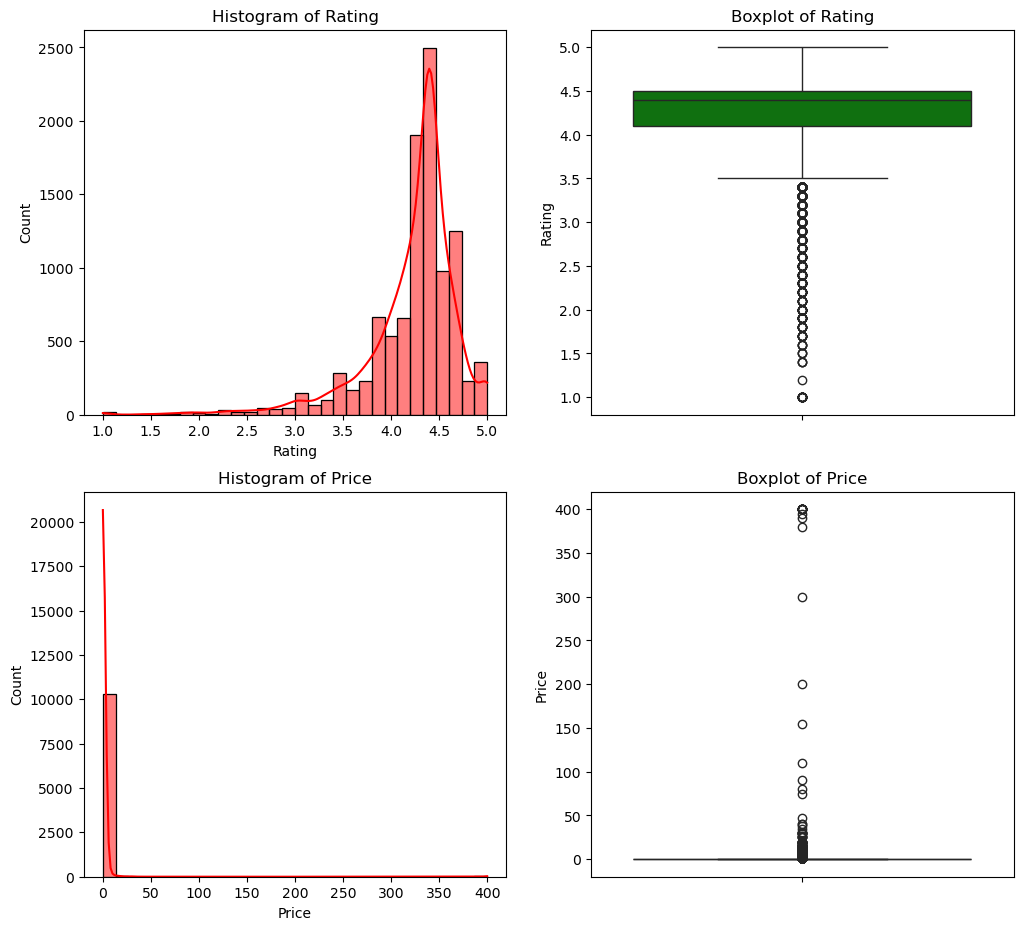

In [41]:
fig,axes=plt.subplots(2,2,figsize=(12,11))
axes=axes.flat

for index,cols in enumerate(['Rating','Price']):
    sns.histplot(df_copy[cols],bins=30,kde=True,ax=axes[index*2],color='red')
    axes[index*2].set_title(f'Histogram of {cols}')


for index,cols in enumerate(['Rating','Price']):
    sns.boxplot(y=df_copy[cols],ax=axes[index*2+1],color='green')
    axes[index*2+1].set_title(f'Boxplot of {cols}')

In [42]:
print(f'The skewness of rating is {df_copy.Rating.skew()}')
print(f'The skewness of Price is {df_copy.Price.skew()}')

The skewness of rating is -2.0734970731940714
The skewness of Price is 23.323250291914242


In [43]:
df_copy[['Rating','Price']].describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,10356.0,4.217864,0.489653,1.0,4.1,4.4,4.5,5.0
Price,10356.0,1.030900,16.279408,0.0,0.0,0.0,0.0,400.0


Insight 1: The rating of apps in google playstore is negatively skewed. This implies that most of the apps are highly rated and enjoyed among users.

Insight 2:The large skewness value of 23.3 of price indicates that it is heavily right-skewed. This means that most of the games are free of cost and some games are very expensive. Since all the 25,50 and 75 percetile is zero, it implies that more than 75% of the games available in google app store are free of cost.

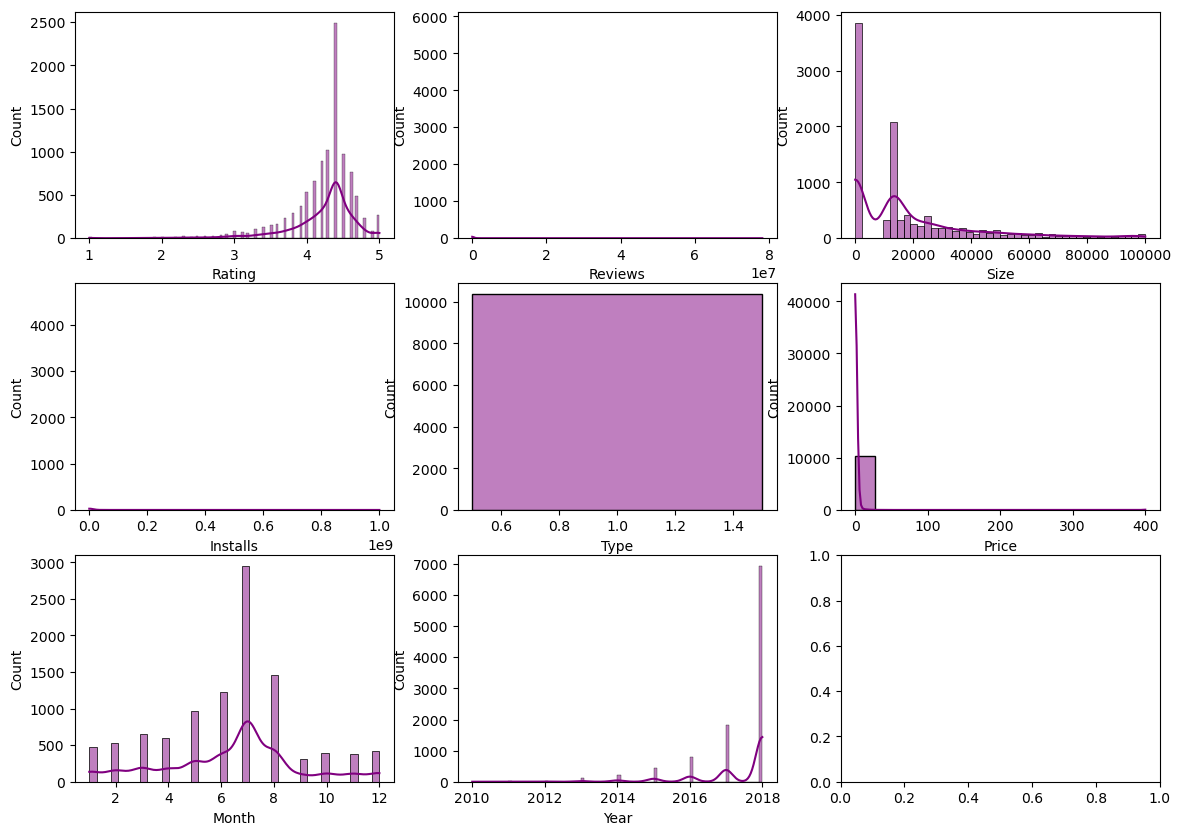

In [44]:
fig,axes=plt.subplots(3,3,figsize=(14,10))
axes=axes.flat
for index,col in enumerate(numerical_features):
    sns.histplot(df_copy[col],ax=axes[index],kde='True',color='Purple')

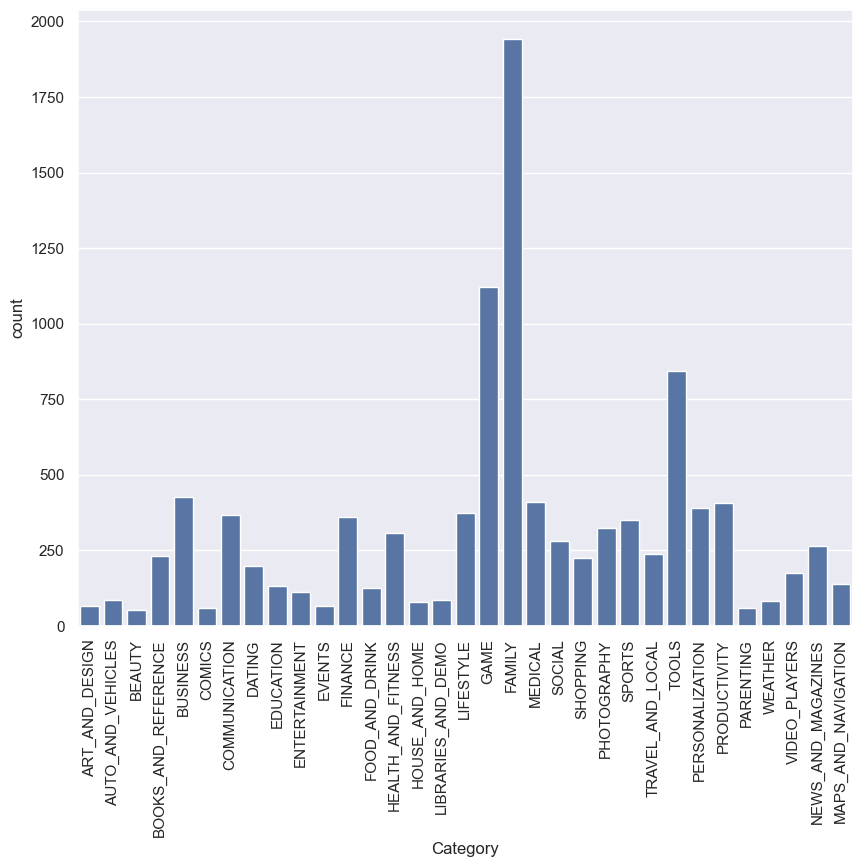

In [45]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x="Category",data=df_copy)
plt.xticks(rotation=90)

plt.show()

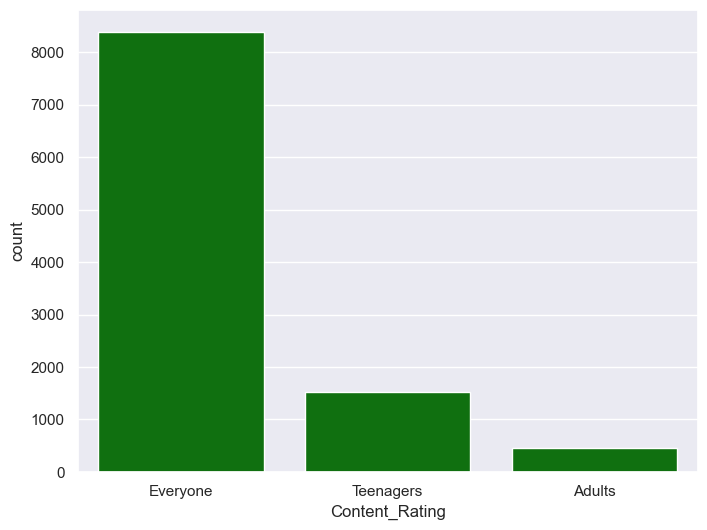

In [46]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(x="Content_Rating",data=df_copy,color='green')

plt.show()

Insight 3: Apps that fall under family and game category are more popular. Moreover, if the content is rated for everyone it has a more chance of being downloaded.

#Bivariate Analysis

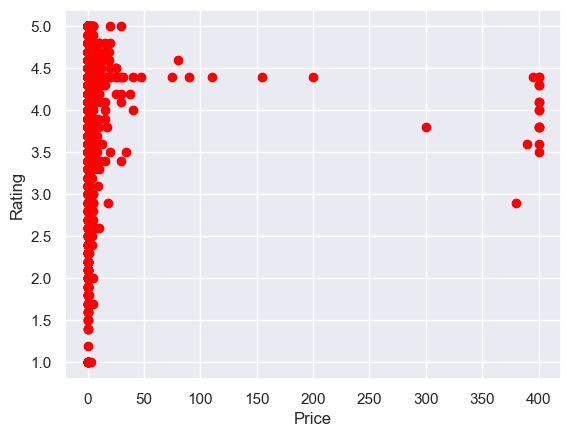

In [47]:
plt.scatter(x='Price',y='Rating',data=df_copy,color='red')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

Insight 4:Since most of the apps are available for free, rating and price do not seem to have a lot of relationship. However, there are few apps that cost more than $50 and almost all of them have rating over 3.

In [48]:
df_numeric=df_copy[numerical_features]
df_numeric.drop('Type',inplace=True,axis='columns')

C:\Users\khadk\AppData\Local\Temp\ipykernel_10144\4148840303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.drop('Type',inplace=True,axis='columns')


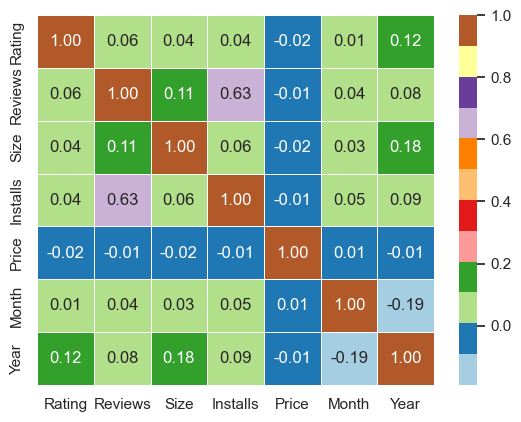

In [49]:
sns.heatmap(df_numeric.corr(),linewidth=0.5,cmap='Paired',annot=True,fmt='.2f')
plt.show()

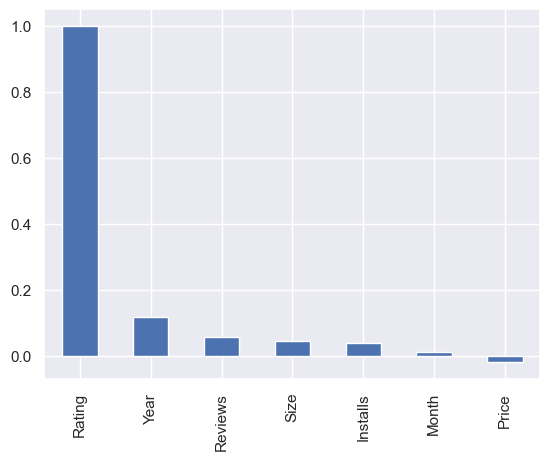

In [50]:
df_numeric.corr()['Rating'].sort_values(ascending=False).plot(kind='bar')
plt.show()

Insight 5: Rating has a positive correlation with year, reviews, size, number of installs and months, whereas, it has a negative correlation with the price.

C:\Users\khadk\AppData\Local\Temp\ipykernel_10144\986077831.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy,x='Category',y='Rating',palette = "Set1")


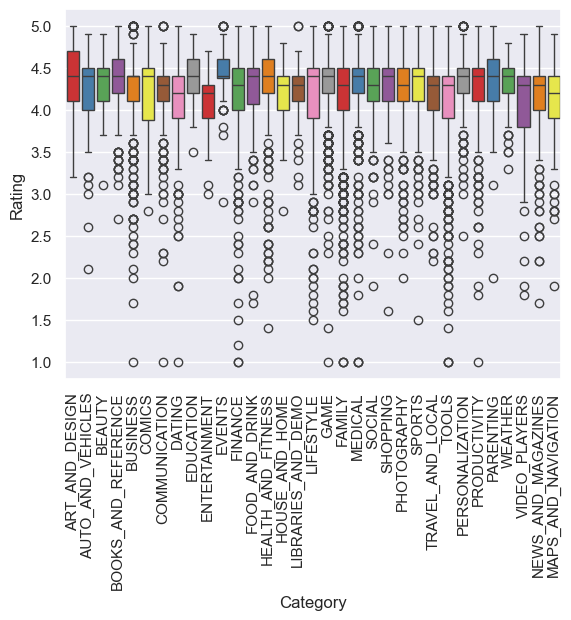

In [51]:
sns.boxplot(data=df_copy,x='Category',y='Rating',palette = "Set1")
plt.xticks(rotation=90)
plt.show()

#Top 10 Category with 5 rating and highest number of installs in google play store:

In [52]:
five_rated=df_copy.loc[df_copy.Rating==5]
five_rated_apps=five_rated['Category']
five_rated_apps_count=five_rated['Category'].value_counts()
print(f"There are {len(five_rated_apps_count)} five rated categories in google play store")

There are 25 five rated categories in google play store


In [53]:
highest_installs=five_rated.nlargest(10,'Installs')[['Category','Installs']]
highest_installs

,Category,Installs
9511,FAMILY,10000
7514,TOOLS,5000
8058,LIFESTYLE,5000
8260,COMICS,5000
329,COMICS,1000
612,DATING,1000
1547,LIBRARIES_AND_DEMO,1000
2527,MEDICAL,1000
4539,BOOKS_AND_REFERENCE,1000
5064,LIFESTYLE,1000


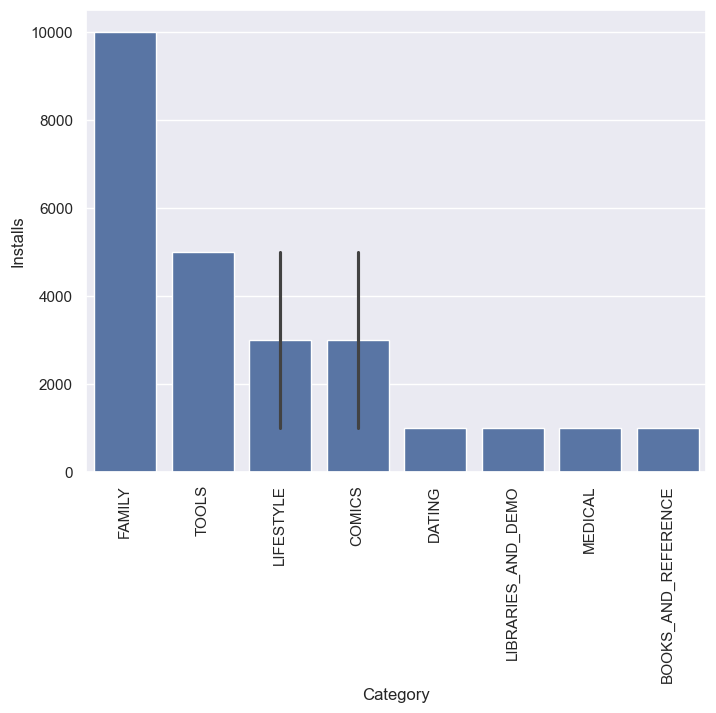

In [54]:
plt.figure(figsize=(8,6))
sns.barplot(x=highest_installs['Category'],y=highest_installs['Installs'])
plt.xticks(rotation=90)
plt.show()

#Insight 6: Among all the 5 rated apps, Ek Bander Ne Kholi Dukan is the most installed app. This app was immensely enjoyed by the users, evidently also because the second five-stared app is almost half the number of it's install.

#Most installed category in each year

In [55]:
year=df_copy.groupby('Year',group_keys=False).apply(lambda x:x.loc[x['Installs'].idxmax(),['Year','Category','Installs']])
year

C:\Users\khadk\AppData\Local\Temp\ipykernel_10144\2839764977.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  year=df_copy.groupby('Year',group_keys=False).apply(lambda x:x.loc[x['Installs'].idxmax(),['Year','Category','Installs']])


,Year,Category,Installs
Year,,,
2010,2010,FAMILY,100000
2011,2011,TOOLS,5000000
2012,2012,LIBRARIES_AND_DEMO,10000000
2013,2013,FAMILY,50000000
2014,2014,TOOLS,50000000
2015,2015,GAME,100000000
2016,2016,TOOLS,100000000
2017,2017,GAME,100000000
2018,2018,BOOKS_AND_REFERENCE,1000000000


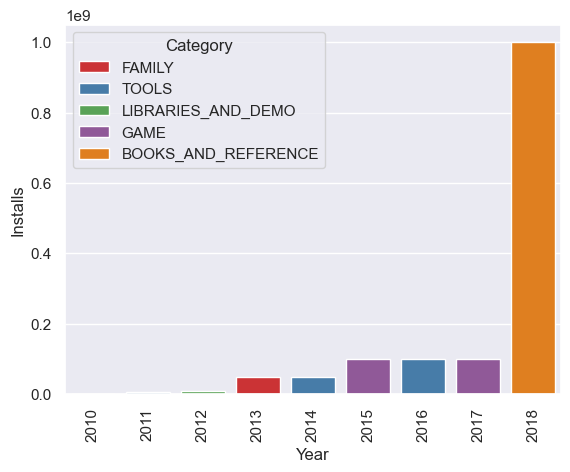

In [56]:
sns.barplot(x=year['Year'], y=year['Installs'], hue=year['Category'],palette = "Set1")
plt.xticks(rotation=90)
plt.show()

Insight 7: The number of the most popular apps being installed was increasing gradually until 2017, whereas, 2018 say that the maximum install of Google Play Books. Over the years, Google Play Book was the app that was downloaded 5 times more in comparision to the number of installs over the other years.

In [57]:
#Does a particular category have a high review and rating?

In [58]:
high_review_rating=df_copy.groupby('Category').agg(avg_rating=('Rating','mean'),avg_reviews=('Reviews','mean')).reset_index()

C:\Users\khadk\AppData\Local\Temp\ipykernel_10144\1205097133.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_rating', y='Category', data=high_review_rating,palette='viridis')


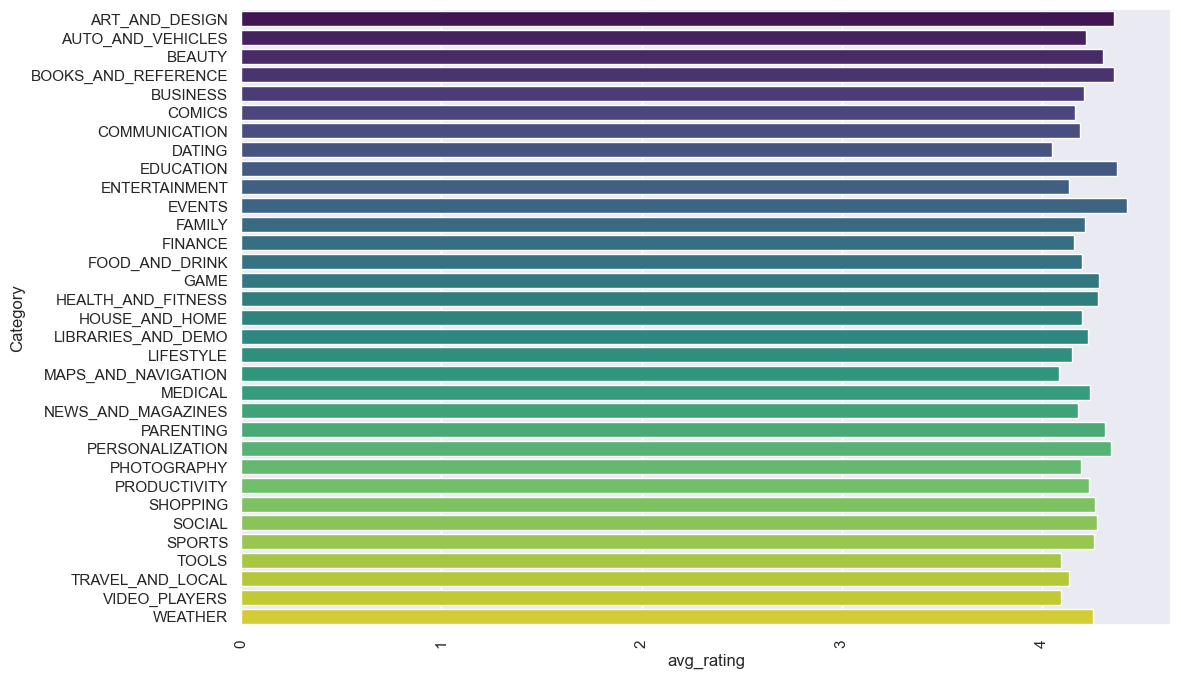

In [59]:
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_rating', y='Category', data=high_review_rating,palette='viridis')

plt.xticks(rotation=90)
plt.show()

Insight 8:All the category have average rating of above 4. This shows that almost all the category in google play store have a high rating.

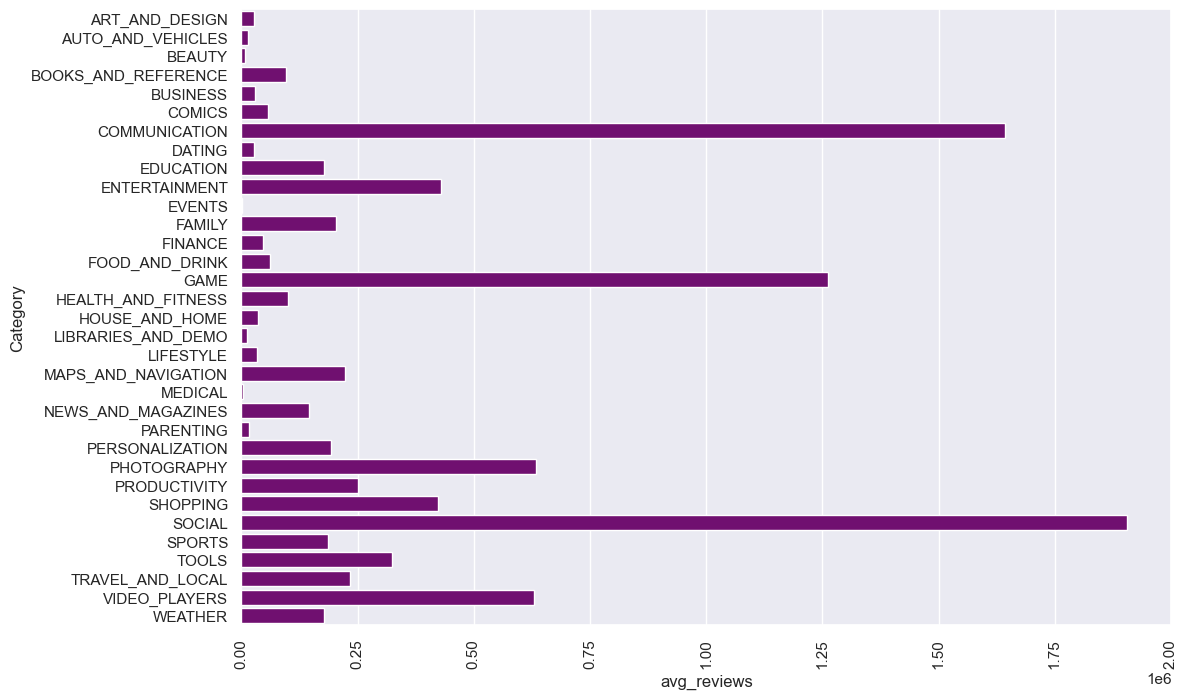

In [60]:
plt.figure(figsize=(12, 8))
sns.barplot(x='avg_reviews', y='Category', data=high_review_rating,color='purple')

plt.xticks(rotation=90)
plt.show()

Insight 9: Usually people do not prefere to write reviews. However, the social,game and communication category has good amount of active users providing critics to the apps.

In [61]:
df_copy.drop(columns=['Last_Updated'],axis=1,inplace=True)

In [62]:
categorical_columns=[feature for feature in df_copy.columns if df_copy[feature].dtype=='object']
categorical_columns

['Category', 'Content_Rating']

In [63]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(handle_unknown='ignore',sparse_output=False)
encoded=encoder.fit_transform(df_copy[categorical_columns])


In [64]:
encoder_df=pd.DataFrame(encoded,columns=encoder.get_feature_names_out(categorical_columns),index=df_copy.index)
df_copy=pd.concat([df_copy,encoder_df],axis=1)

In [65]:
df_copy.drop(columns=['Category', 'Content_Rating'],inplace=True)
df_copy.head()

,Rating,Reviews,Size,Installs,Type,Price,Month,Year,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,...,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content_Rating_Adults,Content_Rating_Everyone,Content_Rating_Teenagers
0,4.1,159,19000.0,10000,1,0.0,1,2018,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.9,967,14000.0,500000,1,0.0,1,2018,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.7,87510,8.7,5000000,1,0.0,8,2018,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.5,215644,25000.0,50000000,1,0.0,6,2018,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4.3,967,2.8,100000,1,0.0,6,2018,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
def categorize_rating(rating):
    if rating<=2:
        return 0 #Poor
    elif rating<=3:
        return 1 #Average
    elif rating<=4:
        return 2 #Good
    else:
        return 3 #Excellent

In [67]:
df_copy.Rating=df_copy.Rating.apply(categorize_rating)

I have written a function to categorize rating into different categories, so that it is easily to classify our targert variable.

#Independent and Dependent Variable:

In [68]:
X=df_copy.drop('Rating',axis=1).to_numpy()
Y=df_copy['Rating']

In [69]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [70]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(random_state=42)

In [71]:
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)

In [72]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train_smote)
X_test_scaled=scaler.transform(X_test)

In [73]:
#Definig a function for performance metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_classifier(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, report, conf_matrix
    

In [74]:
print("Category distribution in training set:")
print(Y_train_smote.value_counts(normalize=True).sort_index() * 100)

Category distribution in training set:
Rating
0    25.0
1    25.0
2    25.0
3    25.0
Name: proportion, dtype: float64


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

classifiers = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
}
classifier_list = []
accuracy_list = []

def evaluate_classifier(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    return accuracy, report, conf_matrix

for name, classifier in classifiers.items():
    classifier.fit(X_train_scaled, Y_train_smote)

    y_train_pred = classifier.predict(X_train_scaled)
    y_test_pred = classifier.predict(X_test_scaled)

    train_accuracy, train_report, train_conf_matrix = evaluate_classifier(Y_train_smote, y_train_pred)
    test_accuracy, test_report, test_conf_matrix = evaluate_classifier(Y_test, y_test_pred)

    classifier_list.append(name)
    accuracy_list.append(test_accuracy)

    print(f"{name}")
    print("Model Performance for Training Set")
    print(f"Accuracy: {train_accuracy:.4f}")
    print("Classification Report:")
    print(train_report)
    print("Confusion Matrix:")
    print(train_conf_matrix)
    print("-" * 60)

    print("Model Performance for Test Set")
    print(f"Accuracy: {test_accuracy:.4f}")
    print("Classification Report:")
    print(test_report)
    print("Confusion Matrix:")
    print(test_conf_matrix)
    print("=" * 60)
    print("\n")


Decision Tree Classifier
Model Performance for Training Set
Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5536
           1       1.00      1.00      1.00      5536
           2       1.00      1.00      1.00      5536
           3       1.00      1.00      1.00      5536

    accuracy                           1.00     22144
   macro avg       1.00      1.00      1.00     22144
weighted avg       1.00      1.00      1.00     22144

Confusion Matrix:
[[5536    0    0    0]
 [   0 5536    0    0]
 [   0    0 5536    0]
 [   0    0    0 5536]]
------------------------------------------------------------
Model Performance for Test Set
Accuracy: 0.6711
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.10      0.13      0.11        90
           2       0.35      0.37      0.36       662
     

In [77]:
results = {}

for model_name, model in classifiers.items():
    train_accuracy = accuracy_score(Y_train_smote, model.predict(X_train_scaled))
    test_accuracy = accuracy_score(Y_test, model.predict(X_test_scaled))
    
    results[model_name] = [train_accuracy, test_accuracy]

results_df = pd.DataFrame(results, index=["Train Accuracy", "Test Accuracy"]).T

print(results_df)

                          Train Accuracy  Test Accuracy
Decision Tree Classifier        1.000000       0.671065
K Neighbors Classifier          0.857975       0.644673
Random Forest Classifier        1.000000       0.745735


Among all the three machine learning algorithm, Random Forest Classifier is the best as it provides a high test accuracy.